In [1]:
import pandas as pd                                     #importing all necesary libraries
import numpy as np  
import matplotlib.pyplot as plt  


In [2]:
df = pd.read_csv("position_salaries.csv")   

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression             # Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)



LinearRegression()

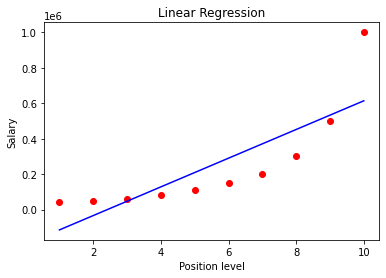

In [9]:
def viz_linear():
    plt.scatter(X, y, color='red')                                # Visualizing the Linear Regression results
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [10]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

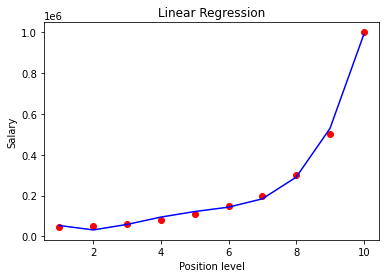

In [11]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [12]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

array([249500.])

In [13]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

array([132148.43750003])

# Accuracy of the model

In [14]:
lin_acc=lin_reg.score(X,y)
print("Accuracy of linear model:0",lin_acc)

Accuracy of linear model:0 0.6690412331929895


In [15]:
poly_acc=pol_reg.score(X_poly,y)
print("Accuracy of polynomial model:0",poly_acc)

Accuracy of polynomial model:0 0.9973922891706614


It's clearly seen that using Polynomial Regression helped us get accuracy 99%

# Comparison of Polynomial degrees

In [16]:
poly_reg = PolynomialFeatures(degree=1)
x_poly=poly_reg.fit_transform(X)
pol_reg.fit(x_poly,y)
ypred1=pol_reg.predict(x_poly)

In [17]:
poly_reg = PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(X)
pol_reg.fit(x_poly,y)
ypred2=pol_reg.predict(x_poly)

In [18]:
poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X)
pol_reg.fit(x_poly,y)
ypred3=pol_reg.predict(x_poly)

In [19]:
poly_reg = PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(X)
pol_reg.fit(x_poly,y)
ypred4=pol_reg.predict(x_poly)

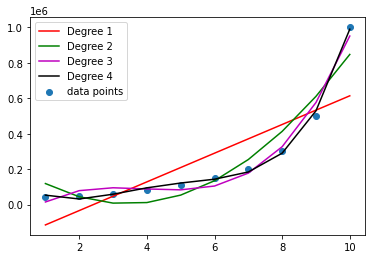

In [20]:
plt.scatter(X,y,label="data points")
plt.plot(X,ypred1, color='r',label="Degree 1")
plt.plot(X,ypred2, color='g',label="Degree 2")
plt.plot(X,ypred3, color='m',label="Degree 3")
plt.plot(X,ypred4, color='k',label="Degree 4")
plt.legend()